In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats.csv


In [ ]:
import io
import pandas as pd
user_df=pd.read_csv(io.BytesIO(uploaded['cookie_cats.csv']))
user_df


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [ ]:
print("Data types for the data set:")
user_df.dtypes
print("Shape of the data i.e. no. of rows and columns")
user_df.shape
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [ ]:
user_df.userid.nunique()/user_df.shape[0]

1.0

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

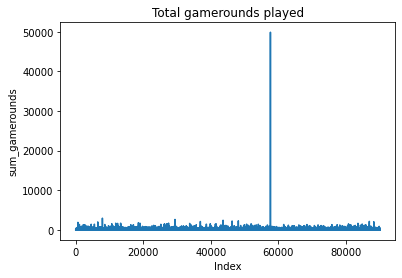

In [ ]:
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [ ]:
print("the max value of sum_grounds")
max_value= max(user_df.sum_gamerounds)
max_value
print(" the index of max value")
index_value = user_df[user_df.sum_gamerounds.isin([max_value])].index.tolist()
index_value

user_df.drop(user_df.index[index_value],inplace=True)

the max value of sum_grounds


49854

 the index of max value


[57702]

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

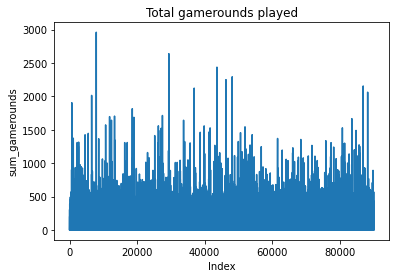

In [ ]:
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [ ]:
retention_rate_7=round((user_df.retention_7.sum()/user_df.shape[0])*100,2)
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")

Overal 7 days retention rate of the game for both versions is:  18.61 %


In [ ]:
user_df[user_df.sum_gamerounds== 0].shape[0]

3994

Text(0.5, 1.0, 'count of players vs sum_grounds')

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

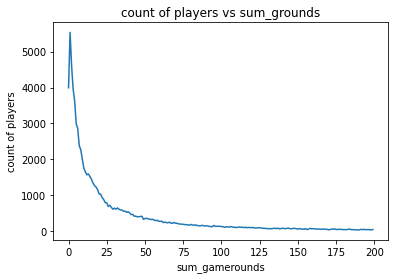

In [ ]:
new_data = user_df[["userid","sum_gamerounds"]].groupby ("sum_gamerounds").count().reset_index().rename(columns = {"userid":"count"})[0:200]
plt.title("count of players vs sum_grounds")
plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")
plt.plot(new_data["sum_gamerounds"],new_data["count"])

In [ ]:
pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


Anaysis Results:

There is negligible differences among two groups but it needs to validate based on crosstab

In [ ]:
user_df[["version","sum_gamerounds"]].groupby ("version").agg("mean")

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


In [ ]:
user_df[(user_df.retention_7==True)&(user_df.version == "gate_40")].sum_gamerounds.mean()

165.6498369368281

Analysis Results:

Appears that there is not much differnces in the total . It actually differs from the player in different versions of games

In [ ]:
user_df["version"] = user_df["version"].replace(["gate_30","gate_40"] , ["A","B"] )
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

In [ ]:
#Reject the null Hypothesis and also the alternate Hypothesis is not normal
shapiro(group_A)
shapiro(group_B)

(0.48864424228668213, 0.0)

(0.48256540298461914, 0.0)

In [ ]:
from scipy.stats.morestats import levene
levene(group_A.sum_gamerounds,group_B.sum_gamerounds)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

**Analsysis Results:**

Type your answer here: Because of two equal variances the p value concludes that fail to reject null hypothesis

In [ ]:
stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds)

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [ ]:
stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds,alternative="greater")

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

Analsysis Results:

Type your answer here:Here we have used mann-whitney u tset to find and check the null hypothesis whether the two groups are different or similar role .repeating the process of mann whitney u method testing with the same value of same null hypothesis but with the alternate hypothesis being with the whether firs group is greater than the second group.The results makes it clear that groupaA and groupB are statisticaly different 

In [ ]:
user_df[["version" , "retention_7" , "retention_1"]].groupby("version").agg("mean")

,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


Analsysis Results:

Type your answer here : Based on the test it shows that the gate_30 has higher in retention rate

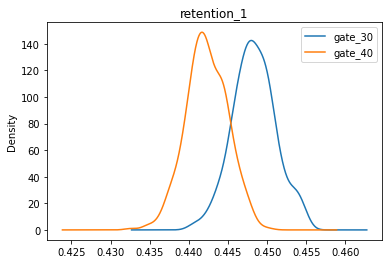

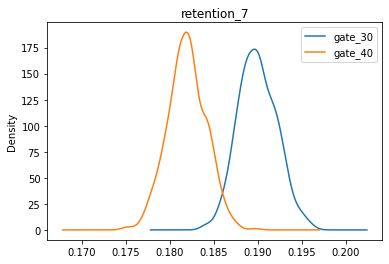

In [ ]:
list_1d = []
list_2d = []
for i in range(500):
     boot_mean1 = user_df.sample(frac=0.7 , replace = True).groupby('version')['retention_1'].mean()
     list_1d.append(boot_mean1.values)

     boot_mean2 = user_df.sample(frac=0.7 , replace = True).groupby('version')['retention_7'].mean()
     list_2d.append(boot_mean2.values)

#Transforming the list to frame
list_1d =  pd.DataFrame(list_1d , columns =['gate_30' , 'gate_40'])
#Transforming the list to frame
list_2d =  pd.DataFrame(list_2d , columns =['gate_30' , 'gate_40'])

list_1d.plot(kind="kde",title="retention_1")
plt.show()

list_2d.plot(kind="kde",title="retention_7")
plt.show()


